In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_data():
    boston = datasets.load_boston()
    X = boston.data
    y = boston.target
    features = boston.feature_names
    return X, y, features

In [3]:
def visualize(X, y, features):
    plt.figure(figsize=(20, 5))
    feature_count = X.shape[1]

    # i: index
    for i in range(feature_count):
        plt.subplot(3, 5, i + 1)
        #TODO: Plot feature i against y
        plt.scatter(X[:, i], y, s=5)
        plt.title('{} - price'.format(features[i]))
        plt.xlabel(features[i])
        plt.ylabel('price')
    plt.tight_layout()
    plt.show()

In [4]:
def train_test_split(X, y, train_ratio=0.8):
    assert X.shape[0] == y.shape[0]
    train_indices = np.random.choice(list(range(y.shape[0])), int(train_ratio * y.shape[0]), replace=False)
    test_indices = [i for i in range(y.shape[0]) if i not in train_indices]
    return X[train_indices], y[train_indices], X[test_indices], y[test_indices]

In [5]:
def fit_regression(X, y):
    #TODO: implement linear regression
    # Remember to use np.linalg.solve instead of inverting!
    X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
    return np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

In [6]:
def predict(X, w):
    X = np.append(np.ones((X.shape[0], 1)), X, axis=1)
    return np.dot(X, w)

In [7]:
def mean_square_error(y, y_hat):
    return np.dot((y_hat - y).T, (y_hat - y)) / y.shape[0]

In [8]:
def mean_absolute_error(y, y_hat):
    return np.sum(np.absolute(y_hat - y)) / y.shape[0]

In [9]:
def R_squared_loss(y, y_hat):
    S_tot = sum((y - y.mean())**2)
    S_res = np.dot((y_hat - y).T, (y_hat - y))
    return 1 - S_res / S_tot

Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dataset: (506, 13)
Targetset: (506,)


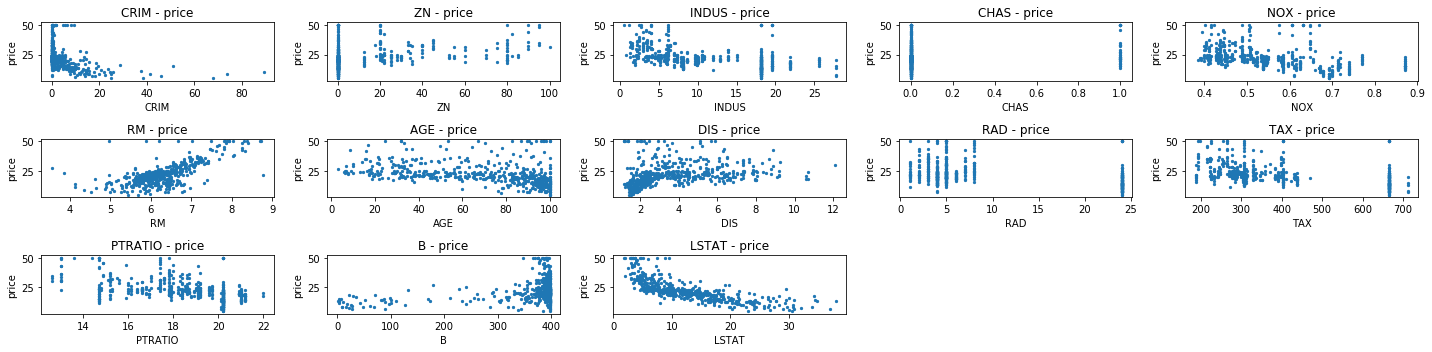

MSE: 17.8281534772
MAE: 3.33427059657
R2: 0.62943646747
f_score: [  88.15124178   75.2576423   153.95488314   15.97151242  112.59148028
  471.84673988   83.47745922   33.57957033   85.91427767  141.76135658
  175.10554288   63.05422911  601.61787111]
p_value: [  2.08355011e-19   5.71358415e-17   4.90025998e-31   7.39062317e-05
   7.06504159e-24   2.48722887e-74   1.56998221e-18   1.20661173e-08
   5.46593257e-19   5.63773363e-29   1.60950948e-34   1.31811273e-14
   5.08110339e-88]


In [10]:
# Load the Boston housing data from the sklearn datasets module
X, y, features = load_data()

# Describe and summarize the data in terms of number of data points, dimensions, target, etc
print("Features: {}".format(features))
print("Dataset: {}".format(X.shape))
print("Targetset: {}".format(y.shape))

# Visualization: present a single grid containing plots for each feature against the target.
# Choose the appropriate axis for dependent vs. independent variables.
visualize(X, y, features)

#TODO: Divide your data into training and test sets, 
# where the training set consists of 80% of the data points (chosen at random).
X_train, y_train, X_test, y_test = train_test_split(X, y)

# Write code to perform linear regression to predict the targets using the training data. 
# Remember to add a bias term to your model.
w = fit_regression(X_train, y_train)

# Test the fitted model on your test set and calculate the Mean Square Error of the result.
y_hat = predict(X_test, w)
MSE = mean_square_error(y_test, y_hat)
print("MSE: " + str(MSE))

# Suggest and calculate two more error measurement metrics.
MAE = mean_absolute_error(y_test, y_hat)
R2 = R_squared_loss(y_test, y_hat)
print("MAE: " + str(MAE))
print("R2: " + str(R2))

# Feature Selection: Based on your results, 
# what are the most significant features that best predict the price? Justify your answer.
from sklearn.feature_selection import f_regression
f_score, p_value = f_regression(X, y, center=True)
print("f_score: " + str(f_score))
print("p_value: " + str(p_value))